In [11]:
import requests
import json

import pandas as pd
#Print all columns and all rows in a panda dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from google.cloud import language_v1 as language

In [12]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt




In [13]:
english_query = """
+(categories:adHocRelease categories:event1 categories:mediaRelease categories:news categories:research)
+C03NEws.publishDate:[20190101000000 to 20211231235959]
+languageId:1
+deleted:false
"""

deutsche_query = """
+(categories:adHocRelease categories:event1 categories:mediaRelease categories:news categories:research)
+C03NEws.publishDate:[20190101000000 to 20211231235959]
+languageId:3
+deleted:false
"""

english_request = requests.get(f"https://db.com/api/content/limit/100/offset/0/render/false/type/json/query/{english_query}")
english_contents = {c['identifier']:c for c in english_request.json()['contentlets']}

deutsche_request = requests.get(f"https://db.com/api/content/limit/100/offset/0/render/false/type/json/query/{deutsche_query}")
deutsche_contents = {c['identifier']:c for c in deutsche_request.json()['contentlets']}

In [14]:
en_df = pd.DataFrame.from_dict(english_contents, orient='index')
en_df.head(1)

,hostName,modDate,publishDate,title,baseType,inode,archived,host,layoutType,working,locked,stInode,contentType,headline,live,owner,identifier,usefulLinks,urlTitle,languageId,URL_MAP_FOR_CONTENT,richText,url,titleImage,modUserName,urlMap,folder,hasTitleImage,sortOrder,modUser,subHeadline,imageSmall,secondReadingBox,imageLarge,teaserText,contactPerson,redirectUrl,excerpt,newsTags,expiryDate,location
e78b1426-e48e-48f7-8ec7-270236710883,www.db.com,2021-03-25 16:58:16.71,2019-02-11 04:02:00.0,Deutsche Bank presents the smallest and most e...,CONTENT,a500bc5a-69d0-4f96-a9c1-55a767264b16,False,8e29bc28-e0f6-40f1-930a-6258631a0985,1,True,False,71b4a34b-8593-4167-9135-06f2f0b39687,C03news,Deutsche Bank presents the smallest and most e...,True,dotcms.org.4139,e78b1426-e48e-48f7-8ec7-270236710883,"<p><a href=""/news/detail/20180503-deutsche-ban...",20190211-deutsche-bank-presents-the-smallest-a...,1,/news/detail/20190211-deutsche-bank-presents-t...,<div>\n<div><span> </span>\n<p>Deutsche Bank i...,/content.6369f25f-a561-4d46-88d1-f4c6b66428f3,TITLE_IMAGE_NOT_FOUND,Jacques Regnier,/news/detail/20190211-deutsche-bank-presents-t...,SYSTEM_FOLDER,False,0,dotcms.org.3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
de_df = pd.DataFrame.from_dict(deutsche_contents, orient='index')
de_df.head(1)

,hostName,modDate,publishDate,title,baseType,inode,archived,host,layoutType,working,locked,stInode,contentType,headline,live,owner,identifier,urlTitle,languageId,URL_MAP_FOR_CONTENT,richText,url,titleImage,modUserName,urlMap,folder,hasTitleImage,sortOrder,modUser,usefulLinks,subHeadline,imageSmall,location,teaserText,contactPerson,redirectUrl
e18d83d1-72c7-4fce-95e8-1e58c6291358,www.db.com,2021-03-25 11:03:06.06,2019-04-16 10:00:00.0,Neun Fakten über ASEAN,CONTENT,3f29c0c0-edef-4786-b119-04b73df8d673,False,8e29bc28-e0f6-40f1-930a-6258631a0985,1,True,False,71b4a34b-8593-4167-9135-06f2f0b39687,C03news,Neun Fakten über ASEAN,True,dotcms.org.4139,e18d83d1-72c7-4fce-95e8-1e58c6291358,20190416-neun-fakten-ueber-asean,3,/news/detail/20190416-neun-fakten-ueber-asean,"<div>\n<div><span> </span>\n<p><img alt="""" src...",/content.90f08213-a31e-4f32-acb9-d11e6f246a9c,TITLE_IMAGE_NOT_FOUND,Jacques Regnier,/news/detail/20190416-neun-fakten-ueber-asean,SYSTEM_FOLDER,False,0,dotcms.org.3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
combined_df = en_df.join(de_df, how='inner', lsuffix='_en', rsuffix='_de')[['title_en', 'title_de']]

In [17]:
pip install --user --upgrade google-cloud-language

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Code from Google at https://codelabs.developers.google.com/codelabs/cloud-natural-language-python3#7
# Probably would be better off changing all the functions to follow the Google standard ones from the codelab, and then making 
# small modifications to the rest of the code to make it all work together.

def analyze_text_sentiment(text):
    
    import math
    if math == "NaN": return ''
    
    client = language.LanguageServiceClient()
    document = language.Document(content=text, type_=language.Document.Type.PLAIN_TEXT)

    response = client.analyze_sentiment(document=document)

    sentiment = response.document_sentiment
    results = dict(
        text=text,
        score=f"{sentiment.score:.1%}",
        magnitude=f"{sentiment.magnitude:.1%}",
    )
    
    # Get sentiment for all sentences in the document
    sentence_sentiment = []
    for sentence in response.sentences:
        sentence_sentiment=sentence.sentiment.score
        #item["text"]=sentence.text.content
        #item["sentiment score"]=sentence.sentiment.score
        #item["sentiment magnitude"]=sentence.sentiment.magnitude
        #sentence_sentiment.append(item)
    
    return sentence_sentiment

In [19]:
combined_df.head()
sentiment_map = combined_df.applymap(analyze_text_sentiment)

In [20]:
sentiment_map

,title_en,title_de
130cb2ef-887f-42af-a455-336289eac071,-0.1,-0.2
89dd8881-7ddd-42f0-92b4-dea32dfd5635,-0.8,-0.1
4da84c8b-70ec-45e3-8d93-6dbc97d40855,0.0,-0.2
bbb1116d-54e8-4e60-ac5c-037e2f6d85dd,0.1,0.7
93628ea1-cf89-44df-844e-b2da7bd4a396,-0.1,0.3
e18d83d1-72c7-4fce-95e8-1e58c6291358,0.0,0.3
adfd1117-f64b-4a33-af82-d2a3430de38d,-0.3,0.1
bef9a751-1147-47f3-90a1-2a10bc843b76,0.3,0.2
62c7c4f1-8a71-4d57-8452-335b5f4aa00f,0.2,-0.5
cf0eeec7-1434-4cf1-b0d1-48737b8f0213,0.0,0.3


Sentiment visualization


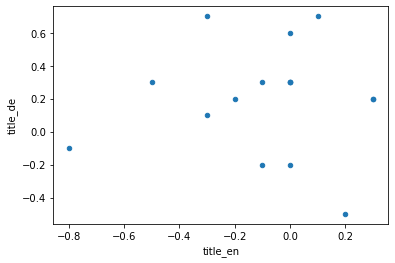

In [36]:

sentiment_map.plot(kind='scatter', x='title_en', y='title_de')
plt.show()

#DE Article Sentiment vs English Sentiment